![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version
- tensorflow==2.3.0
- numpy==1.18.5
- matplotlib==3.2.2

# Image Denoising using Autoencoders

## Dataset
These images contain various styles of text, to which synthetic noise has been added to simulate real-world, messy artifacts. The training set includes the test without the noise (train_cleaned)

### Extract data from zip files

In [1]:
!unzip /content/test.zip
!unzip /content/train.zip
!unzip /content/train_cleaned.zip

### Look at the dataset in more detail

#### Set data directory path variables

In [2]:
features_dir_path = '/content/train/'
labels_dir_path = '/content/train_cleaned/'
test_dir_path = '/content/test/'

#### Check number of images in `train`, `train_cleaned` & `test` folders

In [3]:
import os

print("Number of features: {}".format(len(os.listdir(features_dir_path))))
print("Number of labels: {}".format(len(os.listdir(labels_dir_path))))
print("Number of test images: {}".format(len(os.listdir(test_dir_path))))

Number of features: 144
Number of labels: 144
Number of test images: 72


#### View feature and label

Feature image

(420, 540)


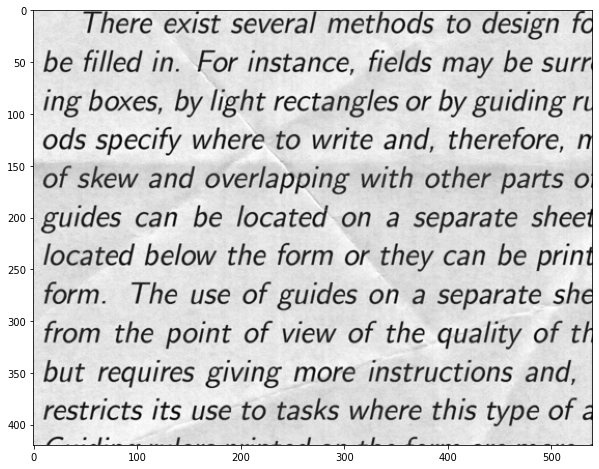

In [4]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20,8))
img = cv2.imread('/content/train/101.png', 0)
plt.imshow(img, cmap='gray')
print(img.shape)

Label image

(420, 540)


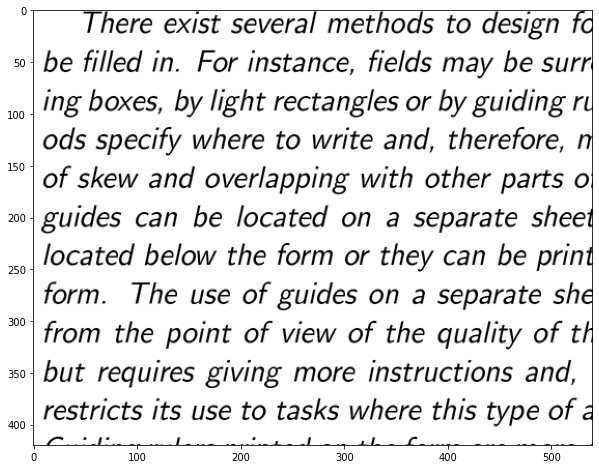

In [5]:
plt.figure(figsize=(20,8))
img = cv2.imread('/content/train_cleaned/101.png', 0)
plt.imshow(img, cmap='gray')
print(img.shape)

### Define function to load the images and save them into numpy array

In [6]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(dir_path):
  image_array = np.zeros((len(os.listdir(dir_path)), 420, 540, 1))
  for i, image_path in enumerate(os.listdir(dir_path)):
    img = load_img(dir_path + image_path, color_mode='grayscale', target_size=(420, 540))
    img = img_to_array(img).astype('float32')/255.
    image_array[i] = img
    
  return image_array

### Get the numpy arrays for features and labels using above function

In [7]:
feature_data = load_images(features_dir_path)
label_data = load_images(labels_dir_path)

#### Print shape of the data

In [8]:
print("Shape of features: {}".format(feature_data.shape))
print("Shape of labels: {}".format(label_data.shape))

Shape of features: (144, 420, 540, 1)
Shape of labels: (144, 420, 540, 1)


## Split data into training and validation

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(feature_data, label_data, test_size=0.1, random_state=1)

print("Number of training samples: ", X_train.shape)
print("Number of validation samples: ", X_val.shape)

Number of training samples:  (129, 420, 540, 1)
Number of validation samples:  (15, 420, 540, 1)


## Define the autoencoder model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

model = Sequential()

# Encoder
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(420, 540, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# Decoder
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2), ))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

## Compile the model

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

## Summarize the model

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 420, 540, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 210, 270, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 210, 270, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 105, 135, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 105, 135, 64)      36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 210, 270, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 210, 270, 32)      1

## Fit the model

In [14]:
model.fit(X_train, y_train, batch_size=16, epochs=150, validation_data=(X_val, y_val))

Epoch 1/150
9/9 [==============================] - 2s 269ms/step - loss: 0.4984 - accuracy: 0.6846 - val_loss: 0.4108 - val_accuracy: 0.6980
Epoch 2/150
9/9 [==============================] - 2s 183ms/step - loss: 0.3713 - accuracy: 0.6884 - val_loss: 0.3593 - val_accuracy: 0.6980
Epoch 3/150
9/9 [==============================] - 2s 182ms/step - loss: 0.3503 - accuracy: 0.6884 - val_loss: 0.3417 - val_accuracy: 0.6980
Epoch 4/150
9/9 [==============================] - 2s 183ms/step - loss: 0.3358 - accuracy: 0.6884 - val_loss: 0.3194 - val_accuracy: 0.6980
Epoch 5/150
9/9 [==============================] - 2s 183ms/step - loss: 0.2992 - accuracy: 0.6884 - val_loss: 0.2637 - val_accuracy: 0.6980
Epoch 6/150
9/9 [==============================] - 2s 182ms/step - loss: 0.2544 - accuracy: 0.6884 - val_loss: 0.2378 - val_accuracy: 0.6980
Epoch 7/150
9/9 [==============================] - 2s 182ms/step - loss: 0.2396 - accuracy: 0.6884 - val_loss: 0.2333 - val_accuracy: 0.6980
Epoch 8/150
9

## Predict on test data

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


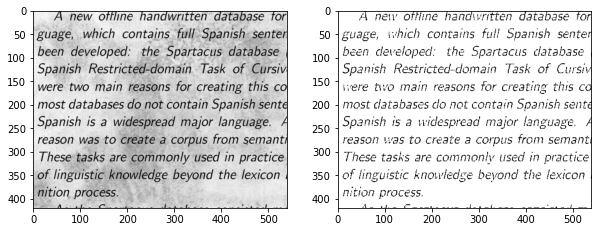

In [15]:
# Let's test our model on a sample test image
sample_test = load_img('/content/test/103.png', grayscale=True, target_size=(420,540))
sample_test = img_to_array(sample_test)
sample_test_img = sample_test.astype('float32')/255.
sample_test_img = np.expand_dims(sample_test, axis=0)

# Get the predition
predicted_label = np.squeeze(model.predict(sample_test_img))

f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label), cmap='gray')
plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


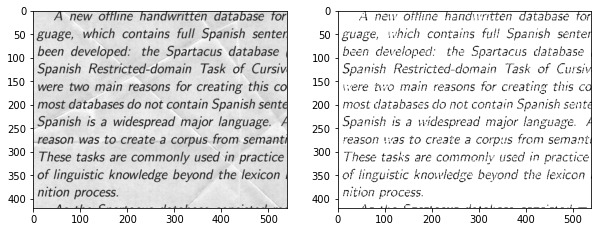

In [16]:
# Let's test our model on a sample test image
sample_test = load_img('/content/test/100.png', grayscale=True, target_size=(420,540))
sample_test = img_to_array(sample_test)
sample_test_img = sample_test.astype('float32')/255.
sample_test_img = np.expand_dims(sample_test, axis=0)

# Get the predition
predicted_label = np.squeeze(model.predict(sample_test_img))

f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label), cmap='gray')
plt.show()

### Explore more
- Explore if you can implement autoencoders on different dataset
- Build more complex and deep architectures to get better results